In [ ]:
# 

## Modules

In [6]:
import cvxopt

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

In [16]:
import scipy.optimize as optimize

## Example of Simple Optimization problem

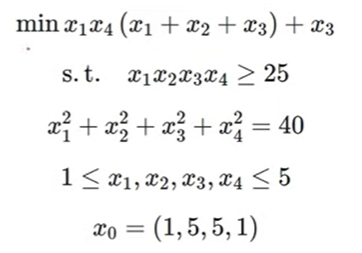

In [23]:
import numpy as np
from scipy.optimize import minimize

In [27]:
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25

def constraint2(x):
    sum_sq=40
    for i in range(4):
        sum_sq=sum_sq-x[i]**2
    return sum_sq

In [28]:
#initial gueses
x0=[1,5,5,1]
objective(x0)

In [29]:
#setuping bounds
b=(1.0,5.0)
bnds=(b,b,b,b)

con1={'type':'ineq','fun':constraint1}
con2={'type':'eq','fun':constraint2}
cons=[con1,con2]

In [31]:
sol=minimize(objective,x0,method='SLSQP',\
             bounds=bnds,constraints=cons)

In [32]:
print(sol)

     fun: 17.01401724563517
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415057])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.7429961 , 3.82115462, 1.37940765])


In [33]:
sol.x

array([1.        , 4.7429961 , 3.82115462, 1.37940765])

In [77]:
def objective(x):
    x1=x[0]
    x2=x[1]
    return -x1**(0.1)*x2**(0.9)

def constraint1(x):
    return 2*x[0]+x[1]*3-125

In [78]:
#setuping bounds
x0=[0,0]
b=(0.0001,120.0)
bnds=(b,b)

con1={'type':'ineq','fun':constraint1}
cons=[con1]

In [79]:
sol=minimize(objective,x0,method='SLSQP',\
             bounds=bnds,constraints=con1)

In [84]:
sol

     fun: -120.00000000000001
     jac: array([-0.09999943, -0.90000057])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([120., 120.])

## Convex optimization

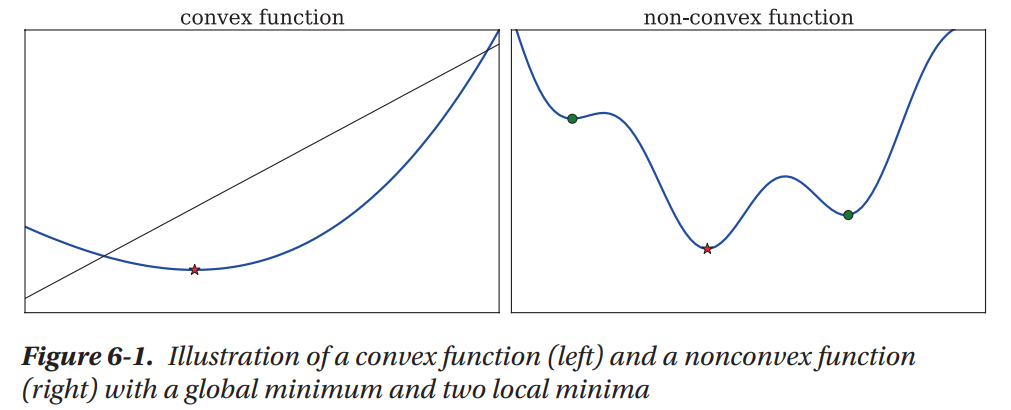

In [ ]:
## Univariate Optimization

Minimize the area of a cylinder with unit volume. Here, suitable
variables are the radius r and height h of the cylinder, and the objective function is
f ([r,h]) = 2πr2
+2πrh, subject to the equality constraint g([r,h]) = πr2
h − 1 = 0.

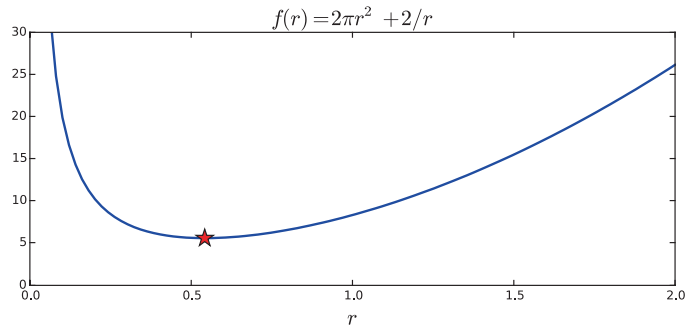

In [8]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume - 1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [9]:
_.evalf()

In [12]:
Area_r.diff(r, 2).subs(r, rsol)

In [13]:
Area_r.subs(r, rsol)

In [14]:
_.evalf()

In [17]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r
r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [18]:
f(r_min)


In [19]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135